<a href="https://colab.research.google.com/github/RainXie23/MANE4961---Machine-Learning-for-Engineering-Fall-2025-/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1

In [51]:
from sklearn import datasets
iris = datasets.load_iris()

from sklearn import svm

X = iris.data[:, 2:4]
y = iris.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(
    X,y,
    test_size=0.40,
    train_size=0.60,
    random_state=123,
    shuffle=True,
    stratify=y)

from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
preds = clf.predict(X_test)
acc = accuracy_score(y_test,clf.predict(X_test) )
print('accuracy score :', acc)

accuracy score : 0.9666666666666667


Question 2

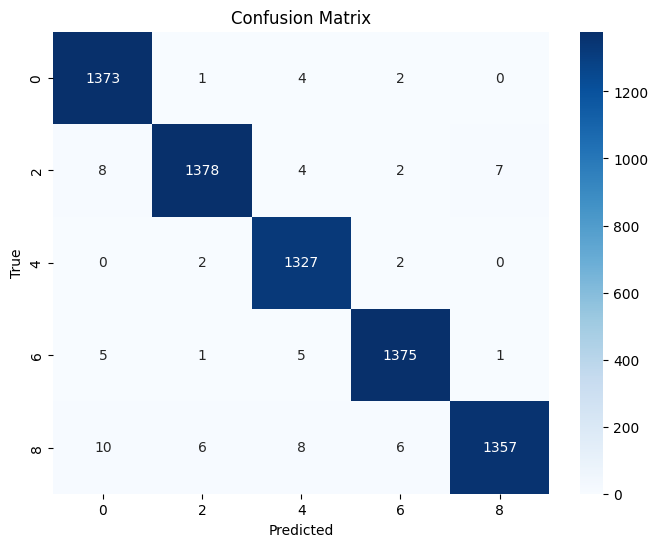

np.int64(1375)

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target.astype(int)

even_mask = y % 2 == 0
X_even = X[even_mask]
y_even = y[even_mask]

X_train, X_test, y_train, y_test = train_test_split(X_even, y_even, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

even_labels = np.unique(y_test)
label_index = np.where(even_labels == 6)[0][0]

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

correct_sixes = conf_matrix[label_index][label_index]
correct_sixes

sorry i dont know how to fix the heat map but seems like majority the pixels are correctly predicted? 2d pairplot is not good here because each pixel is taken as a feature so theres too many combinations

Question 3

In [53]:
import numpy as np
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


In [54]:
data = load_iris()

df = pd.DataFrame()
df['sepal length'] = data['data'][:,0]
df['sepal width'] = data['data'][:,1]
#df['petal length'] = data['data'][:,2]
df['petal width'] = data['data'][:,3]

df

,sepal length,sepal width,petal width
0,5.1,3.5,0.2
1,4.9,3.0,0.2
2,4.7,3.2,0.2
3,4.6,3.1,0.2
4,5.0,3.6,0.2
...,...,...,...
145,6.7,3.0,2.3
146,6.3,2.5,1.9
147,6.5,3.0,2.0
148,6.2,3.4,2.3


In [55]:
X = df.to_numpy()

In [56]:
df['tag'] = data['target']

for elm in df['tag']:
  tag = data.target_names[elm]

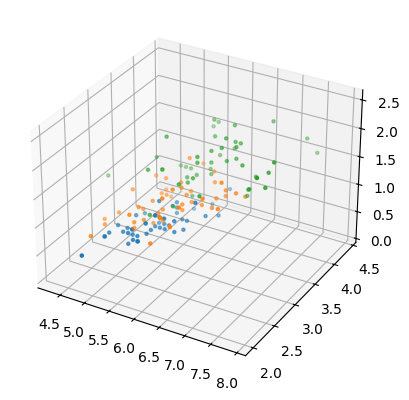

In [57]:
x = 'sepal length'
y = 'sepal width'
z = 'petal width'

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for target_class in df['tag'].unique():
    subset = df[df['tag'] == target_class]
    ax.scatter(
        subset[x],
        subset[y],
        subset[z],
        label=data.target_names[target_class],
        s=5
    )

plt.show()

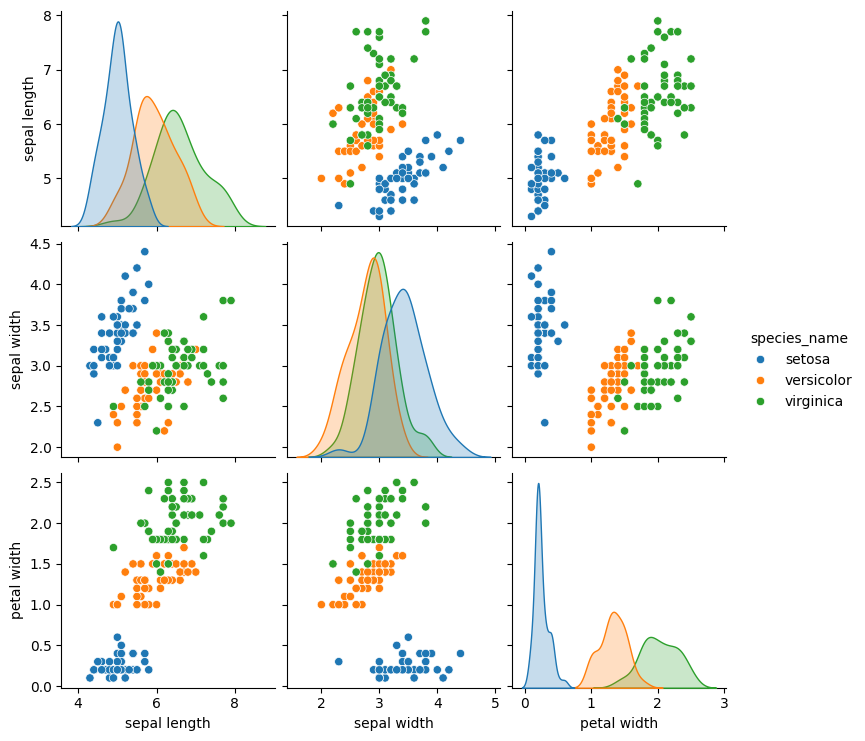

In [58]:
df['species_name'] = df['tag'].map(lambda x: data.target_names[x])
sns.pairplot(df.drop(labels=['tag'],axis=1), hue='species_name')

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(X, test_size=0.30, random_state=42)

X_train.shape, X_test.shape

((105, 3), (45, 3))

In [65]:
class KMeans3D:
    def __init__(self, k):
        self.k = k
        self.centroids = None
        self.labels = None

    def fit(self, X, max_iters=100, tol=1e-4):
        # Step 1: Initialize centroids randomly from data
        self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False)]

        for _ in range(max_iters):
            # Step 2: Assign points to nearest centroid
            labels = np.array([
                np.argmin([np.linalg.norm(x - centroid) for centroid in self.centroids])
                for x in X
            ])

            # Step 3: Recalculate centroids
            new_centroids = np.zeros((self.k, X.shape[1]))
            for i in range(self.k):
                points_in_cluster = X[labels == i]
                if len(points_in_cluster) > 0:
                    new_centroids[i] = np.mean(points_in_cluster, axis=0)
                else:
                    # If a cluster lost all points, reinitialize its centroid randomly
                    new_centroids[i] = X[np.random.randint(0, X.shape[0])]


            # Step 4: Check for convergence
            shift = np.linalg.norm(self.centroids - new_centroids)
            if shift < tol:
                break

            self.centroids = new_centroids
            self.labels = labels

    def predict(self, X):
        if self.labels is None:
            raise ValueError("Fit the model first by calling the 'fit' method.")
        labels = np.array([
            np.argmin([np.linalg.norm(x_point - centroid) for centroid in self.centroids])
            for x_point in X
        ])
        return labels

In [63]:
model = KMeans3D(k=3)
model.fit(X_train)
kmeans_labels = model.predict(X_test)
cluster_coords = model.centroids
print('predicted_labels:', kmeans_labels)
print('cluster centroids:', cluster_coords)

predicted_labels: [2 0 1 2 1 0 2 1 2 2 1 0 0 0 0 1 1 2 2 1 0 2 0 1 1 1 1 1 0 0 0 0 1 0 0 2 1
 0 0 0 2 2 1 0 0]
cluster centroids: [[4.96451613 3.37741935 0.2483871 ]
 [6.8516129  3.1        1.98064516]
 [5.74883721 2.67906977 1.41860465]]


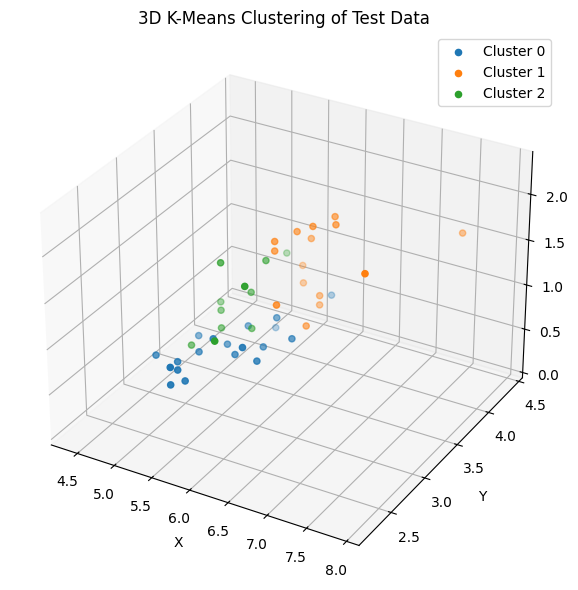

In [64]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot each cluster with a different color
for cluster_id in range(model.k):
    # Use X_test and the predicted labels for plotting
    points = X_test[kmeans_labels == cluster_id]
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], label=f'Cluster {cluster_id}')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D K-Means Clustering of Test Data')
ax.legend()
plt.tight_layout()
plt.show()

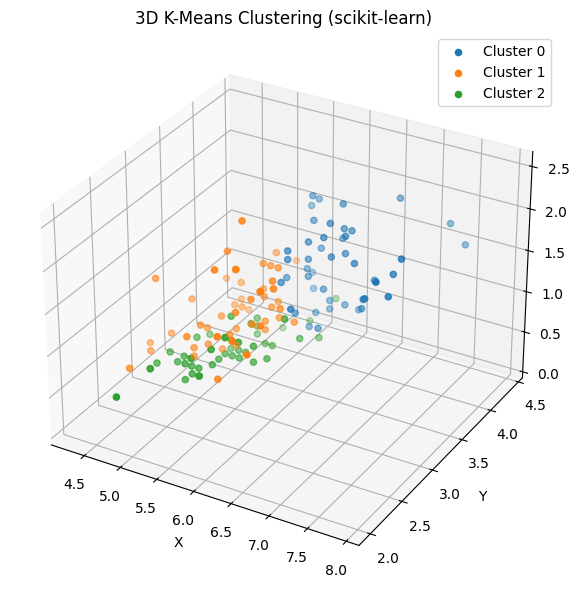

In [68]:
from sklearn.cluster import KMeans
skmodel = KMeans(
    n_clusters=3,
    init='k-means++',
    n_init='auto',
    max_iter=300,
    tol=0.0001,
    verbose=0,
    random_state=None,
    copy_x=True,
    algorithm='lloyd',
)

skmodel.fit(X_train)

skmodel_labels = skmodel.predict(X)
df['skmodel_labels'] = skmodel_labels
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot each cluster with a different color using skmodel_labels and X
for cluster_id in range(skmodel.n_clusters):
    points = X[skmodel_labels == cluster_id]
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], label=f'Cluster {cluster_id}')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D K-Means Clustering (scikit-learn)') # Added title for clarity
ax.legend()
plt.tight_layout()
plt.show()